## Case Study Background
This week, your manager ask you if you could show some form of natural patterns or segmentations in the way users book tickets so that we can investigate each subgroup in depth. You realise that clustering is the approach to achieve this goal.

## Learning Objectives
- Understand how $k$-means works
- Understand what kind of datasets $k$-means is suitable for
- Learn to choose appropriate values of $k$ by using the elbow method and/or VAT Algorithm
- Understand and apply manual clustering using Hierarchical Algorithms
- Be able to analyse clustering results
- Understand the intuition of Principal Component Analysis and explained variance ratio
- Know how to use PCA to visualise clustering results for high-dimensional datasets

## Workshop Overview

1. Manually cluster data using kmeans algorithm
2. Write functions to cluster the dataset using `kmeans` algorithm
4. Determine the appropriate value of k of `kmeans`for the given dataset, using the VAT and Elbow method
5. Manually cluster data using hierarchical clustering algorith
6. Write functions to cluster the dataset using `hierarchical` algorithm
7. Visualize the dendogram obtained from `hierarchical` clustering algorithm to draw insights from the data
8. Perform PCA with `sklearn`
9. Visualize k-means output for high-dimensional dataset with PCA

## <u> Concept: Kmeans clustering  </u>

$k$-means clustering is one of the most common unsupervised Machine Learning algorithms. The objective of $k$-means is to group _similar data points together_ and to find underlying patterns. To achieve this objective, $k$-means looks for a fixed number of $k$ clusters in a dataset. A cluster refers to the unique set of data points aggregated together according to similarities. Usually, the similarity metric is the Euclidean Distance between any two points. 

The algorithm requires the user to define a hyperparameter $k$ - the total number of centroids we want. A centroid is center of the cluster. $k$-means will then iteratively assign data points to the closest centroid.

Generally, the $k$-means algorithm has the following pseudocode:  
```python
k = number of centroids
randomly assign an initial starting point for each centroid

while True:
    for each data point:
        calculate similarity (distance) with data point and centroid
        assign data point to closest centroid
    
    for each centroid:
        recompute the centroid
        
    if no change to centroid (it has stabilized) or max iterations exceeded:
        return final centroids
    
```

<blockquote style="padding: 10px; background-color: #FFD392;">
    
## Exercise (By Hand)
    
Let's start off with a simple pen and paper exercise. Consider the following 2-dimensional data:

| ID | x | y |
|----|---|---|
| A  | 1 | 1 |
| B  | 2 | 1 |
| C  | 4 | 3 |
| D  | 5 | 4 |    

Show the iterations of the $k$-means algorithm using Euclidean distance when $k = 2$, and the random seeds are initialized to `(1,1)` and `(2,1)`.

**Answer:**

Cluster 1:

    - Members: A, B
    - Centroid: (1.5, 1)
    
Cluster 2:

    - Members: C, D
    - Centroid: (4.5, 3.5)

### Python implementation with `sklearn`

Now, lets go through the same problem using Python to verify our answers. 

In [1]:
import numpy as np
from sklearn.cluster import KMeans

# usually we don't specify the random points as sklearn has a built-in method of setting fixed random states
initial_clusters = np.array([[1,1], [2,1]])
data_points = np.array([[1,1], [2,1], [4,3], [5,4]])

kmean = KMeans(n_clusters=2, init=initial_clusters)
kmean.fit(data_points)

print('kmean assignments [A, B, C, D]:', kmean.labels_)
print('Final Centroid for cluster 0:')
print(kmean.cluster_centers_[0])
print('Final Centroid for cluster 1:')
print(kmean.cluster_centers_[1])

kmean assignments [A, B, C, D]: [0 0 1 1]
Final Centroid for cluster 0:
[1.5 1. ]
Final Centroid for cluster 1:
[4.5 3.5]


/usr/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


### Apply to a larger dataset

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('clustering.csv')
data.head()

,movie_rating,time_on_site,quantity
0,8.64,119.691050,7
1,8.53,199.034445,1
2,8.06,108.412824,1
3,7.38,141.560956,6
4,4.60,110.504130,3


In [3]:
from sklearn.cluster import KMeans

clusters = KMeans(n_clusters=2)
clusters.fit(data)

KMeans(n_clusters=2)

In [4]:
def plot_kmeans(df, clusters):
    """
    generate a 3d plot given sklearn's kmeans implementation 
    """
    colormap = {0: 'red', 1: 'green', 2: 'blue'}
    
    fig = plt.figure(figsize=(7, 10))
    ax = plt.axes(projection="3d")
    ax.scatter(df['time_on_site'], 
               df['quantity'], 
               df['movie_rating'],
               c=[colormap.get(x) for x in clusters.labels_])
    
    ax.set_ylabel('quantity')
    ax.set_xlabel('time_on_site')
    ax.set_zlabel('movie_rating')
    ax.set_title(f"k = {len(set(clusters.labels_))}")
    
    plt.show()

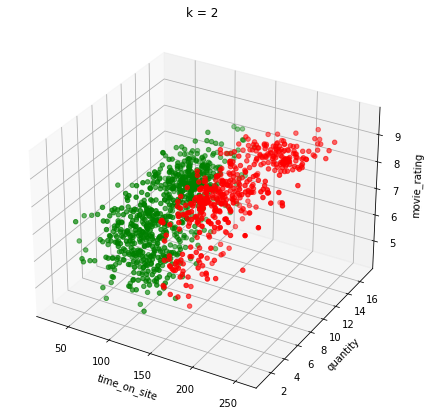

In [5]:
  plot_kmeans(data, clusters)

#### Bonus

The tutor group has written a 2-means implementation from scratch using `numpy` and `pandas`, and demonstrated it on 5 random data point from `data`. Due to limited time, we will not explain the source code, but it is available as `kmeans_demo.py` if you want to have a look at (not required to replicate). This function prints the step-by-step output and visualises the subset in 3D scatterplot at each iteration.

    from kmeans_demo import kmeans_demo
    kmeans_demo()

**Follow-up question:**

Is 𝑘=2 a suitable value? How can we determine this?

### <u> Concept: Visual Assessment of clustering Tendency (VAT) </u>

VAT is a visual method of assessing the clustering tendency of a dataset. The algorithm can reveal the number of clusters that can be found in a dataset, whilst also depicting cluster patterns. This is accomplished by ordering the matrix of pairwise object dissimilarities to create an intensity map. That is, densely colored squares along the left diagonal that indicated the clusters.

In general, the way to see the number of clusters for a given VAT algorithm is to identify the number of densely colored squares within the intensity map. The number of colored squares can be used to specify an approximate $k$ valye for the $k$-means clustering algorithm.

In [6]:
# local script in the same directory as the notebook
# you don't need to understand the code, but rather, focus on the interpretation
from vat import VAT
import seaborn as sns

Firstly, we need to _normalize_ our dataset such that our clusters are on an even scale.

Remember, _normalization_ is the equivalent of _min-max scaling._

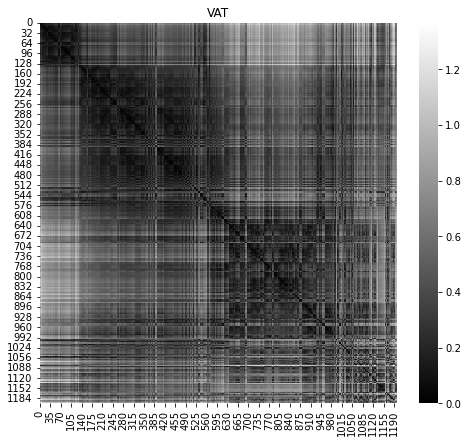

In [7]:
from sklearn.preprocessing import MinMaxScaler
normalized_data = MinMaxScaler().fit_transform(data)

# Plot VAT
RV, _, I = VAT(normalized_data) # I are the reordered indices

plt.figure(figsize=(8, 7))
sns.heatmap(RV, cmap='gray')
plt.title("VAT")

plt.show()

<blockquote style="padding: 10px; background-color: #ebf5fb;">

## Class Discussion Question
From the VAT map above, how many clusters can we distinctly see? What value of $k$ should we use?

_It seems like there are $k=3$ distinct clusters._

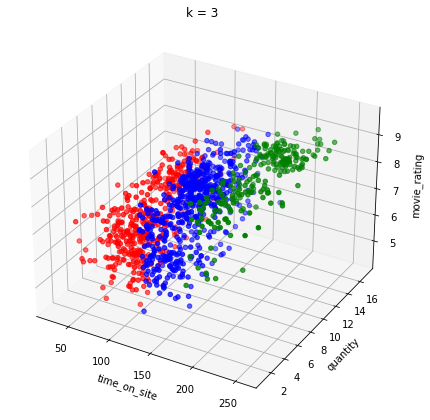

In [8]:
clusters = KMeans(n_clusters=3).fit(data)
plot_kmeans(data, clusters)

<blockquote style="padding: 10px; background-color: #ebf5fb;">

## Class Discussion Question
Does this plot above look _correct_? Are there any steps missing? If yes, adjust the code to show the new plot

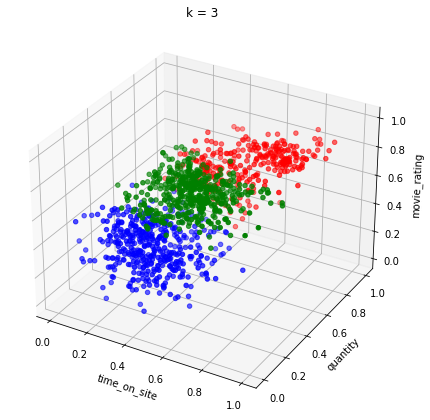

In [9]:
normalized_data = pd.DataFrame(normalized_data, columns=data.columns)
clusters = KMeans(n_clusters=3).fit(normalized_data)
plot_kmeans(normalized_data, clusters)

### <u> Concept: Elbow Method</u>
Beside VAT, we can also use the Elbow Method to determine the optimal number of cluster(s). 

The elbow methods requires the user to run the $k$-means clustering on the dataset for a range of $k$:
```
for k in range(...):
    perform k-means clustering
    calculate average distance from every centroid to every point
    
plot these points to find the where the average distance from the centroid falls (known as the elbow)
```

Let's use the Elbow Method to determine the optimal number of cluster(s).

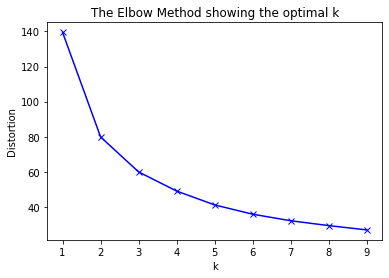

In [10]:
distortions = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(normalized_data)
    distortions.append(kmeans.inertia_) # Question: What does kmeans.inertia_ return? 
    
plt.plot(k_range, distortions, 'bx-')

plt.title('The Elbow Method showing the optimal k')
plt.xlabel('k')
plt.ylabel('Distortion')

plt.show()

<blockquote style="padding: 10px; background-color: #ebf5fb;">

## Class Discussion Questions
1. From the Elbow Method above, what value of $k$ should we use?
    
After completion of the $k$-means algorithm, we may compute a quality measure for the resulting clustering, known as SSE (Sum of Squared Errors). SSE is the sum of distances of objects from their cluster centroids. 

2. Do you think it is more desirable for a clustering to have higher or lower SSE? Why?
3. As the number of clusters increases, would you expect the SSE to increase or decrease? Why?

## <u> Concept: Hierarchical Clustering (HC) </u>

Hierarchical Clustering is a method of cluster analysis which seeks to build a hierarchy of clusters. Strategies for HC fall under two types:
- Agglomerative: This is a "bottom-up" approach. Each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
- Divisive: This is a "top-down" approach. All observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

We will be covering ***Agglomerative Clustering*** in this workshop. 

The pseudocode of Agglomerative Clustering is as follows:
```python
compute proximity matrix (distance between each point to every other point)
let each data point be its own cluster

while True:
    merge the two closest cluster
    update proximity matrix
    
    if single cluster remains:
        break
```

To merge the two closest clusters, it is necessary to determine _how_ the distance is computed. For example, it can be computed between:
- the two most similar parts of a cluster (single-linkage);
- the two least similar bits of a cluster (complete-linkage);
- the center of the clusters (mean or average-linkage);
- or some other criterion. 

The output of a hierarchical clustering technique can be visualized using a **Dendrogram**. A Dendrogram is a tree-like diagram that records the sequences of merges or splits.

We will demostrate single-linkage HC with a sample of the dataset

In [11]:
sample = pd.read_csv('clustering.csv').sample(5, random_state=26).reset_index(drop=True)
sample

,movie_rating,time_on_site,quantity
0,8.57,105.461032,10
1,7.15,95.991941,3
2,7.73,160.992288,4
3,8.16,139.504768,6
4,7.63,129.079253,7


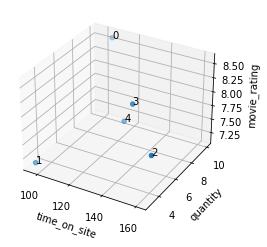

In [12]:
# Visualise the 5 data point

from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection="3d")

ax.scatter(sample['time_on_site'], 
           sample['quantity'], 
           sample['movie_rating'])
ax.set_xlabel('time_on_site')
ax.set_ylabel('quantity')
ax.set_zlabel('movie_rating')

for i in range(5):
    ax.text(sample['time_on_site'][i], 
           sample['quantity'][i], 
           sample['movie_rating'][i], 
           i)
plt.show()

### Step 1: Calculate pairwise distance matrix

In [13]:
from scipy.spatial.distance import pdist, squareform
pd.DataFrame(squareform(pdist(sample))).round().astype(int)

,0,1,2,3,4
0,0,12,56,34,24
1,12,0,65,44,33
2,56,65,0,22,32
3,34,44,22,0,10
4,24,33,32,10,0


### Step 2: Iteratively merging data points

<blockquote style="padding: 10px; background-color: #FFD392;">
    
## Exercise (By Hand)
_Your tutor may start off the first couple iteration(s) to give you an idea of what to do._

Using the above distance matrix, apply agglomerative HC using Euclidean distance, with single linkage (min) criterion. At each iteration, answer the following questions:

- Which two rows are merged in this iteration?
    
- What would be the resulting table after the merge?
    
- Does your merge decision agree with the 3D scatter plot?

**SOLUTIONS**

<u>Iteration 1:</u> Merge 3 & 4

|       | 0  | 1  | 2  | (3+4) |
|-------|----|----|----|-------|
| 0     | 0  | 12 | 56 | 24    |
| 1     | 12 | 0  | 65 | 33    |
| 2     | 56 | 65 | 0  | 22    |
| (3+4) | 24 | 33 | 22 | 0     |

<u>Iteration 2:</u> Merge 0 & 1

|       | (0+1) | 2  | (3+4) |
|-------|-------|----|-------|
| (0+1) | 0     | 56 | 24    |
| 2     | 56    | 0  | 22    |
| (3+4) | 24    | 22 | 0     |

<u>Iteration 3:</u> Merge 2 & (3+4)

|           | (0+1) | (2+(3+4)) |
|-----------|-------|-----------|
| (0+1)     | 0     | 24        |
| (2+(3+4)) | 24    | 0         |

Now, let's perform the clustering using `scipy` and visualise the result as a dendogram.

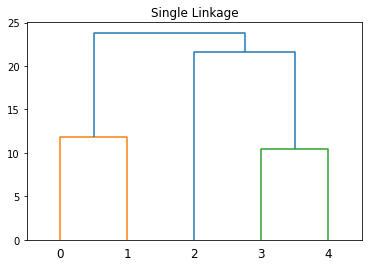

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage
D = pdist(sample)
hc = linkage(sample, 'single')
dendrogram(hc, labels=sample.index)
plt.title('Single Linkage')
plt.show()

<blockquote style="padding: 10px; background-color: #ebf5fb;">

## Discussion Questions
1. When would HC be more useful than K-Means? Conversely, when would K-Means be more useful than HC?
2. What does the y-value of the dendogram represent? Does this agree with your by-hand workings?



## <u>Concept: Principle Component Analysis (PCA) Visualization</u>
- PCA is used to transform high-dimensional data (i.e many features) into a lower-dimensional representation (i.e fewer features).
- It is especially useful for visualization and to improve computational efficiency by removing outliers or noisy data.
- In layman's terms, PCA aims to discover a new coordinate system such that most of the **variance** is concentrated along the coordinates from most to least.
- One common use case of PCA is to visualise clustering output for high dimensional data.

#### Intuitive explanation of the PCA algorithm
- PCA discards dimensions (i.e features) that tell us very little about the data.
- Once the features are discarded, we will be left with a smaller coordinate system (usually 2D axes).
- The smaller coordinate system will *encapsulate* most of the **variance** in the dataset.
- In other words, dimensions that do not have much variation in the data or holds little information will be discarded.

In the following example, imagine if instead of just 3 features, we have collected a user behaviour dataset with 30 features. After running a 2-means clustering algorithm, you need to visualise the output to present to the manager. Plotting 30 features on a scatterplot is not feasible, so you decided to reduce the dimensionality of your dataset with PCA.

In [15]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [16]:
pca_data = pd.read_csv('pca.csv')
pca_data

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
0,-0.734813,-2.834815,-4.554009,-7.444389,6.363215,-0.166032,-1.407411,2.635098,-0.598159,7.184899,...,-8.366917,4.076429,2.664759,1.300397,0.855186,0.722187,1.303414,-0.304663,5.604633,-5.013702
1,-4.402090,-0.279574,-4.174069,-2.223990,-7.865856,-3.017668,2.705414,-0.615524,3.170800,1.383366,...,3.120900,-4.567987,-15.249835,-0.878003,0.666230,-1.849594,4.501257,-4.503171,-2.087741,-12.395254
2,-0.795630,-3.360031,1.116885,-3.039926,0.129944,-0.230940,1.106633,-0.815621,2.950032,5.912564,...,2.925407,-0.851214,-1.407044,6.680735,-1.208256,3.176663,-3.260872,-1.297405,-0.740994,0.688457
3,-2.420614,-0.874134,0.395809,3.130045,1.655578,1.146261,-1.834100,-0.057324,7.497362,-0.827915,...,1.044861,1.952787,6.812413,-4.642526,0.153182,4.706067,3.194874,0.829948,1.261124,12.231877
4,-5.146652,-0.270930,-3.014745,0.503729,-0.645226,0.759290,0.088985,6.405849,2.203890,3.248916,...,4.250417,-5.803834,-14.495750,-0.623166,-2.141602,3.933480,-8.434774,-0.897335,-0.492823,-14.220943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2.419667,-2.903670,-2.863183,0.526027,7.091853,-4.264179,-1.812298,3.110307,-1.805625,0.511780,...,4.604490,2.037668,-15.312761,0.954180,1.202037,1.365958,-0.382619,0.588860,-1.272311,-16.861577
196,1.587944,-4.762594,0.482682,-0.064567,-0.436291,-2.491316,0.369542,3.178175,-0.318707,-0.952703,...,-5.102550,1.955758,4.808537,-0.893015,-6.573304,-1.462796,-1.694163,0.165401,-4.904745,-4.899586
197,-0.446887,-1.805106,4.493611,1.211150,0.005324,-6.185108,-0.339644,3.407739,-0.126642,0.431080,...,-0.692909,1.807778,3.241813,2.140824,0.334501,-3.535555,1.986230,-3.298104,-2.881044,-0.936659
198,-1.383739,0.415562,5.008799,-3.538682,-12.268950,-4.549904,-1.934834,-0.397804,-3.980964,0.420956,...,4.820739,-0.532877,8.594791,5.053177,-6.994032,3.457584,3.158128,3.050920,-5.950127,4.536940


In [17]:
# conduct PCA with n=3 components (or axis)
sklearn_pca = PCA(n_components=3)
X_pca = sklearn_pca.fit_transform(pca_data)

The attribute of interest (and something you should remember) is `explained_variance_ratio_`. 

This is to see how much of the variance is being explained by the first X components. In this case, we have 3 components.

In [18]:
explained_var = sklearn_pca.explained_variance_ratio_

print(f"Variance explained by each PC: {explained_var}")   
print(f"Total variance explained: {explained_var.sum():.4f}")

Variance explained by each PC: [0.26022308 0.21027171 0.14114954]
Total variance explained: 0.6116


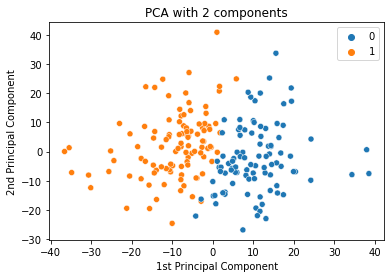

In [19]:
# Perform 2-means clustering
clusters = KMeans(n_clusters=2).fit(pca_data)

# Visualise the first 2 PCs
sns.scatterplot(x=X_pca[:,0], 
                y=X_pca[:,1],
                hue=clusters.labels_)
plt.title("PCA with 2 components")
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.show()

<blockquote style="padding: 10px; background-color: #FFD392;">
    
## Exercise
Try plotting all 3 PCs on a 3D scatterplot. You may modify the `plot_kmeans()` function defined earlier.

1. Comment on how the groups are displayed compared to the PCA scatterplot above?
2. Would you use the original (30 features), or the PCA-reduced (3 PCs) dataset for the clustering algorithm?

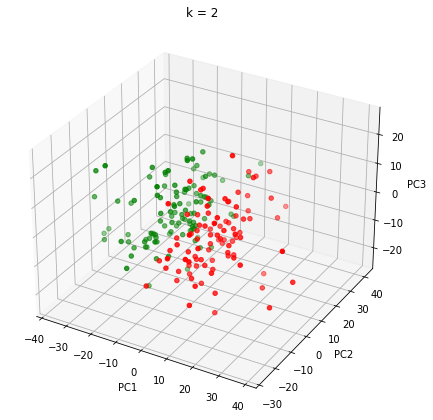

In [20]:
# SOLUTION 

# Perform 2-means clustering
clusters = KMeans(n_clusters=2).fit(pca_data)

colormap = {0: 'red', 1: 'green', 2: 'blue'}
    
fig = plt.figure(figsize=(7, 10))
ax = plt.axes(projection="3d")
ax.scatter(X_pca[:,0], 
           X_pca[:,1], 
           X_pca[:,2],
           c=[colormap.get(x) for x in clusters.labels_])

ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_zlabel('PC3')
ax.set_title(f"k = {len(set(clusters.labels_))}")

plt.show()

**Follow-up question:**

Try running the algorithm with `n_components=30`, comment on the total variance explained, as well as any notable features you find out about the coefficients

**Answer:** 
- Increasing `n_components` doesn't change the components' coefficients (PC1 is still the same as the PC1 from the `n_components=3`). This is because PCA algorithm looks for **independent** dimensions.